In [1]:
import pickle
import numpy as np
import face_recognition
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
with open('./__real_encodings.pkl', 'rb') as f:
    real_encodings_dict = pickle.load(f)
with open('./__generated_encodings.pkl', 'rb') as f2:
    generated_encodings_dict = pickle.load(f2)

In [3]:
real_encodings_list = []
for i, d in real_encodings_dict.items():
    real_encodings_list.append(d['enc'])

In [4]:
generated_encodings_list = []
for i, d in generated_encodings_dict.items():
    generated_encodings_list.append(d['enc'])

In [14]:
dist_mat_imp1 = []
for enc in real_encodings_list:    
    # dist_mat.append(face_recognition.face_distance(real, enc))
    dist_mat_imp1.append(face_recognition.face_distance(generated_encodings_list, enc))

In [32]:
dist_list_imp1 =  []
for i, arr in enumerate(dist_mat_imp1):
    for e in arr[:i]:
#     for e in arr[:i+1]:
        dist_list_imp1.append(e)

In [29]:
dist_mat_imp2 = []
for enc in real_encodings_list:    
    dist_mat_imp2.append(face_recognition.face_distance(real_encodings_list, enc))
    # dist_mat_imp1.append(face_recognition.face_distance(generated_encodings_list, enc))

In [30]:
dist_list_imp2 =  []
for i, arr in enumerate(dist_mat_imp2):
    for e in arr[:i]:
        dist_list_imp2.append(e)

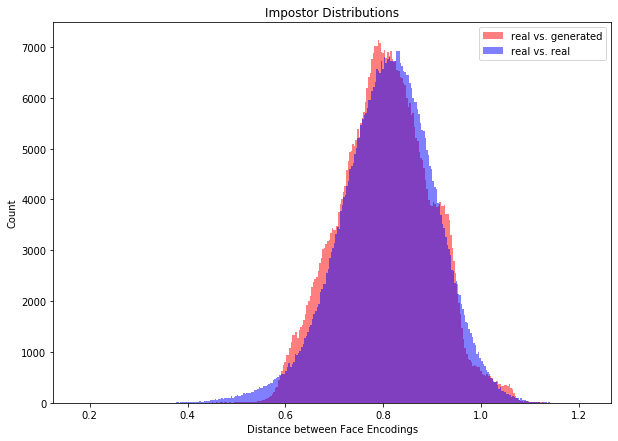

In [37]:
plt.figure(figsize=(10,7), facecolor='white')
plt.title('Impostor Distributions')
plt.hist(dist_list_imp1, bins='auto', color='red', alpha=0.5, label='real vs. generated')
plt.hist(dist_list_imp2, bins='auto', color='blue', alpha=0.5, label='real vs. real')
plt.xlabel('Distance between Face Encodings')
plt.ylabel('Count')
plt.legend()
plt.show()

In [46]:
s, p = stats.ks_2samp(dist_list_imp1, dist_list_imp2)
s, p

(0.034128128128128155, 4.3274372507707633e-253)

In [45]:
# null hypothesis = 2 independent samples are drawn from the same continuous distribution

In [47]:
# p < 0.05, so we reject the null hypothesis --> data is drawn from different distributions